AVCAD - Exercise 8

Students: Maria Dolgaya (28168) and Mariana Coelho (25605)

Using the dataset in EFIplus_medit.zip:


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import statsmodels.stats as stm
from statsmodels.formula.api import ols
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 18 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 3.6+ MB


1. Run a simple linear regression relating the species richness with each one of the continuous
environmental variables in the dataset: Altitude, Actual_river_slope, Elevation_mean_catch,
prec_ann_catch, temp_ann, temp_jan, temp_jul. Before running the analyses, check if any of the
variables requires to be transformed and apply the appropriate transformation. Compute the
regression coefficient estimates, the r-square and the F-statistics. You may plot the fitted model.

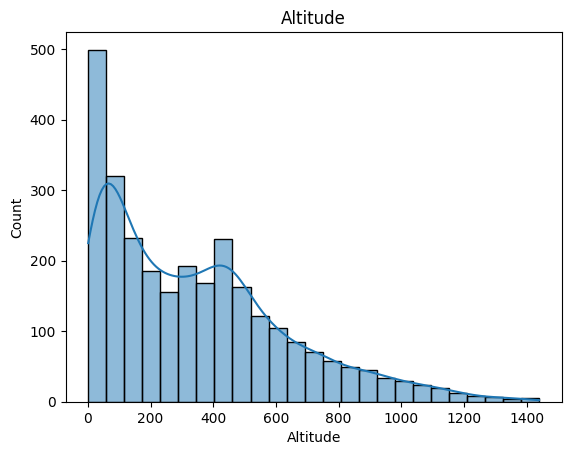

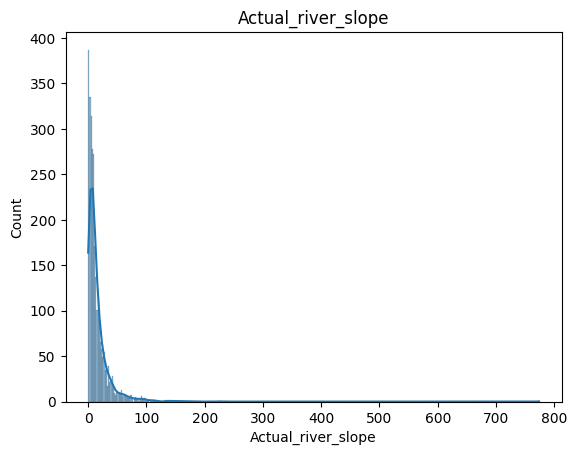

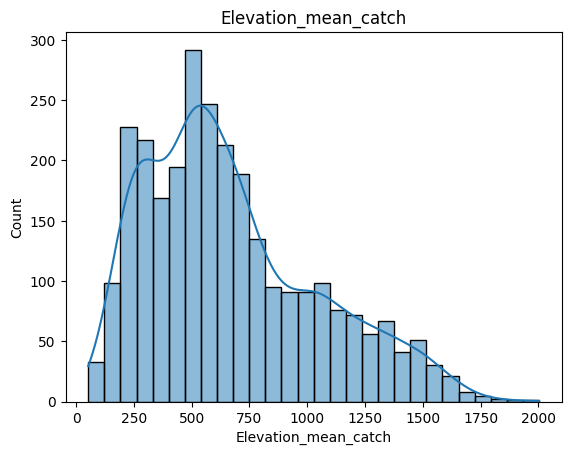

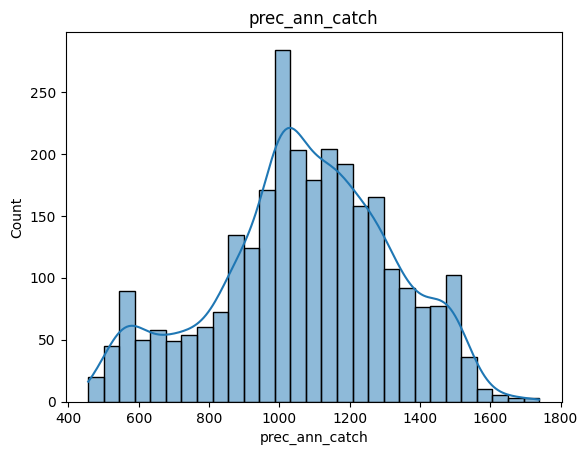

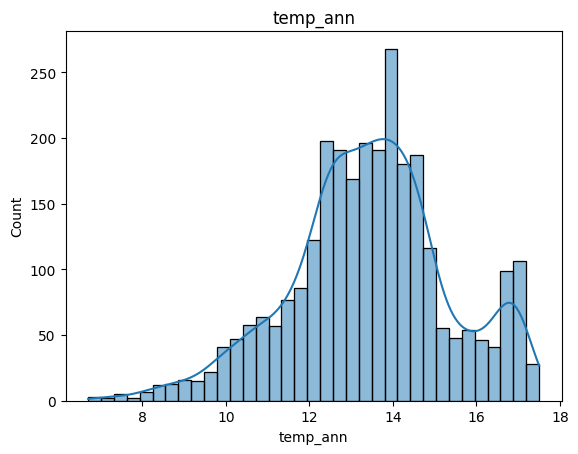

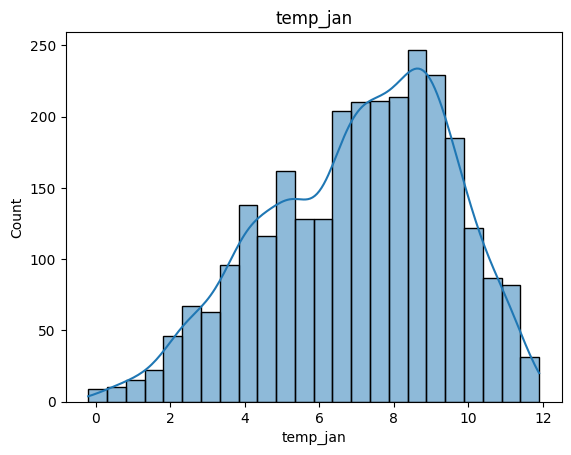

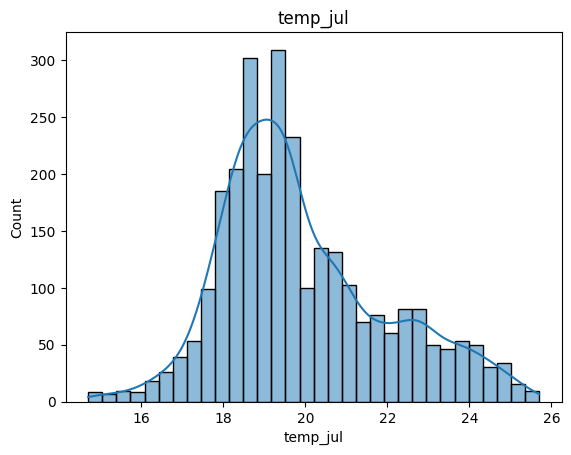

In [3]:
continuous_variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
for var in continuous_variables:
    sns.histplot(df[var], kde=True)
    plt.title(var)
    plt.show()

In [4]:
# Define the target variable
# Get the columns for species
species_columns = df.columns[df.columns.get_loc('Abramis brama'):]

# Calculate species richness
df['Species_Richness'] = df[species_columns].sum(axis=1)

# Print just the 'Species_Richness' column
print(df['Species_Richness'])


18      6
19      6
28      7
32      8
43      7
       ..
5006    5
5007    7
5008    6
5009    1
5010    6
Name: Species_Richness, Length: 2822, dtype: int64


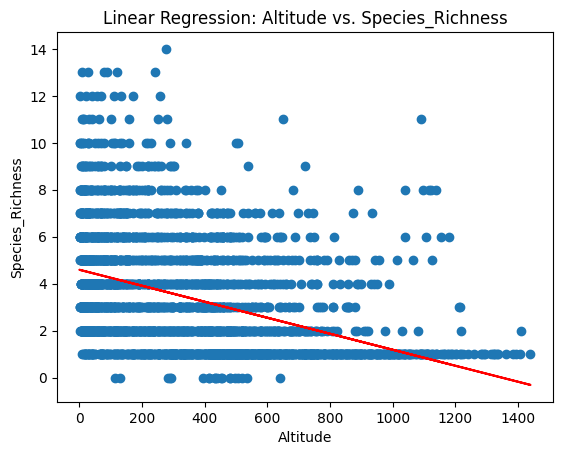

Regression results for Altitude:
Slope estimate: -0.00
R-squared: 0.166
P-value: 0.000000


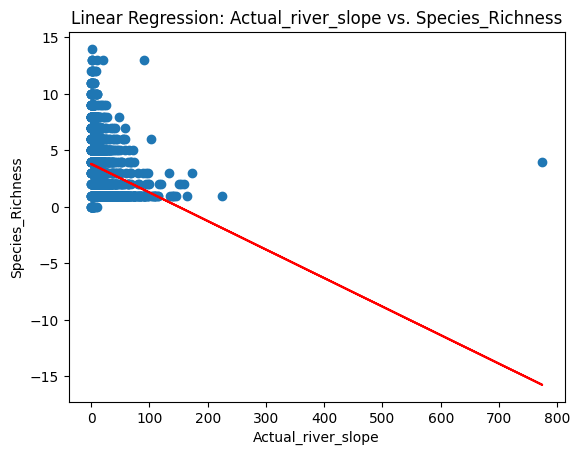

Regression results for Actual_river_slope:
Slope estimate: -0.03
R-squared: 0.063
P-value: 0.000000


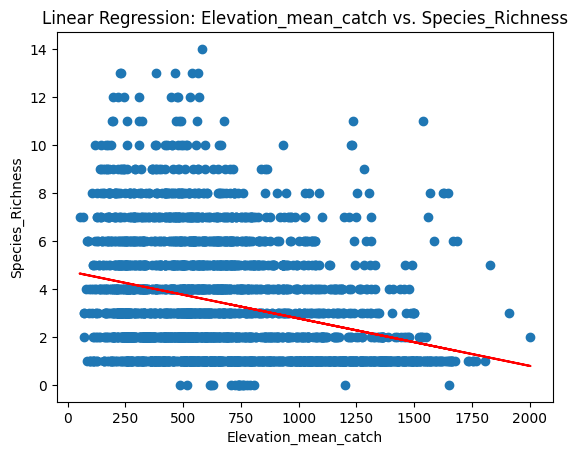

Regression results for Elevation_mean_catch:
Slope estimate: -0.00
R-squared: 0.091
P-value: 0.000000


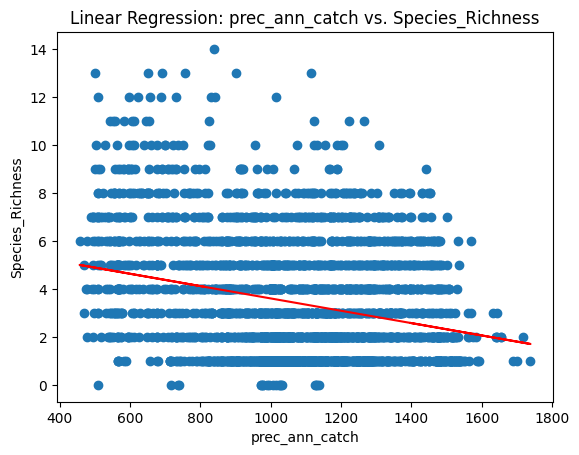

Regression results for prec_ann_catch:
Slope estimate: -0.00
R-squared: 0.070
P-value: 0.000000


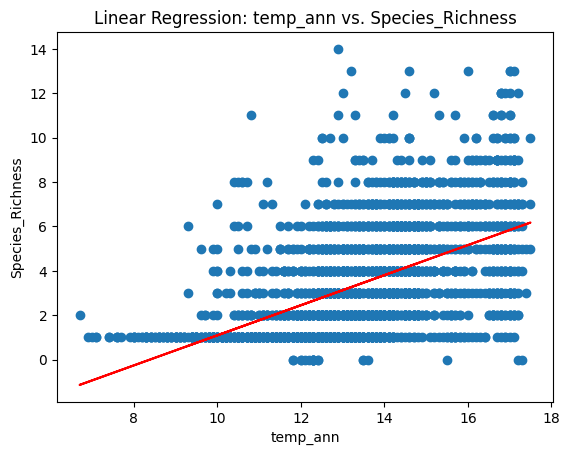

Regression results for temp_ann:
Slope estimate: 0.68
R-squared: 0.283
P-value: 0.000000


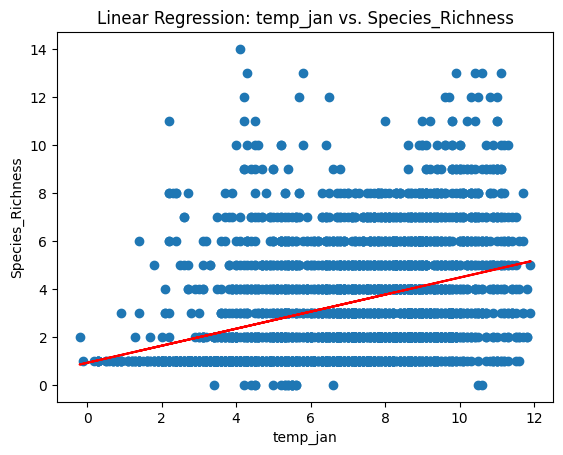

Regression results for temp_jan:
Slope estimate: 0.36
R-squared: 0.127
P-value: 0.000000


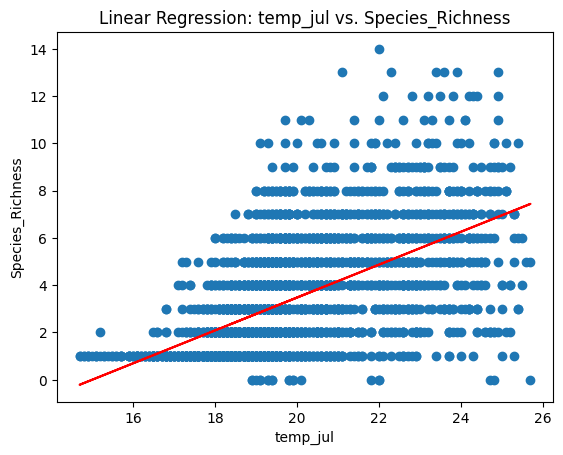

Regression results for temp_jul:
Slope estimate: 0.70
R-squared: 0.334
P-value: 0.000000


In [5]:
for var in continuous_variables:
    x = df[var]
    y = df['Species_Richness']
    
    # Execute linear regression
    slope, intercept, r, p, std_err = sts.linregress(x, y)

    # Plot data with fitted line
    plt.scatter(x, y)
    plt.plot(x, intercept + slope * x, color="red")
    plt.xlabel(var)
    plt.ylabel('Species_Richness')
    plt.title(f'Linear Regression: {var} vs. Species_Richness')
    plt.show()

    # Print regression results
    print(f'Regression results for {var}:')
    print(f'Slope estimate: {slope:.2f}')
    print(f'R-squared: {r**2:.3f}')
    print(f'P-value: {p:.6f}')

In [6]:
# Run the regression test
print('slope estimate=%.2f, r-square=%.3f, p=%.6f' % (slope, r**2, p))
alpha=0.05
if p <= alpha:
 print('reject H0 that the slope of the relationship is = 0')
else:
 print('fail to reject H0 that the slope of the relationship is = 0')

slope estimate=0.70, r-square=0.334, p=0.000000
reject H0 that the slope of the relationship is = 0


In [7]:
x2 = x
x2 = sm.add_constant(x2) # adding a constant (Intercept)

model = sm.OLS(y, x2).fit()
predictions = model.predict(x2) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Species_Richness   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     1412.
Date:                Thu, 09 May 2024   Prob (F-statistic):          6.32e-251
Time:                        16:01:38   Log-Likelihood:                -5940.0
No. Observations:                2822   AIC:                         1.188e+04
Df Residuals:                    2820   BIC:                         1.190e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4399      0.371    -28.166      0.0

2. Now try to run a multiple linear regression with the same data and check the differences between the previous univariate regression coefficients and the new coefficients. Plot the partial dependence plots to compare responses with the previous single effects.

In [8]:
y=df['Species_Richness']
x=df[['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']]

x = sm.add_constant(x) # adding a constant (Intercept)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Species_Richness   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     247.3
Date:                Thu, 09 May 2024   Prob (F-statistic):          2.30e-287
Time:                        16:01:38   Log-Likelihood:                -5836.4
No. Observations:                2822   AIC:                         1.169e+04
Df Residuals:                    2814   BIC:                         1.174e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.0384 

In [9]:
df.rename(columns={'Species_Richness':'species_richness'}, inplace=True) # inplace="True" means that df will be updated
df.rename(columns={'Altitude':'altitude'}, inplace=True) 
df.rename(columns={'Actual_river_slope':'actual_river_slope'}, inplace=True) 
df.rename(columns={'Elevation_mean_catch':'elevation_mean_catch'}, inplace=True)
df.rename(columns={'prec_ann_catch':'prec_annual_catch'}, inplace=True)
df.rename(columns={'temp_ann':'temp_annual'}, inplace=True)
df.rename(columns={'temp_jan':'temp_january'}, inplace=True)
df.rename(columns={'temp_jul':'temp_july'}, inplace=True)

# formula: response ~ predictor1 + predictor2 + ...
model = smf.ols(formula='species_richness ~ altitude + actual_river_slope + elevation_mean_catch + prec_annual_catch + temp_annual + temp_january + temp_july', data=df).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       species_richness   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     247.3
Date:                Thu, 09 May 2024   Prob (F-statistic):          2.30e-287
Time:                        16:01:38   Log-Likelihood:                -5836.4
No. Observations:                2822   AIC:                         1.169e+04
Df Residuals:                    2814   BIC:                         1.174e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -7.0384 

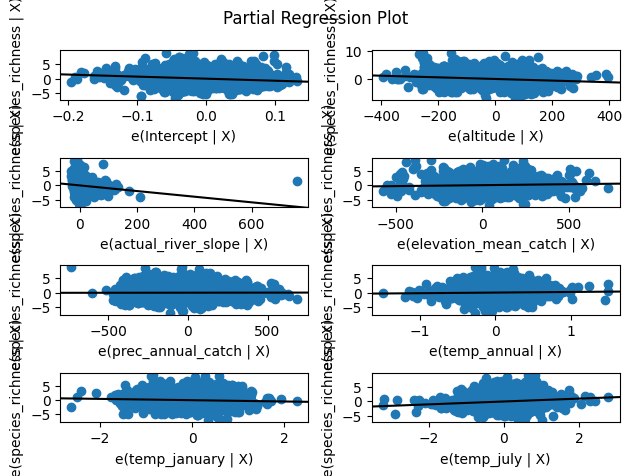

In [10]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

3. Check the multicolinearity among the predictor variables and run a second more parsimonious
regression model. Check how the coefficients have changed.

In [11]:
# Code to produce functions to run diagnostic plots  
# https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html

# base code
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type
import statsmodels

style_talk = 'default'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """


    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)


    def __call__(self, plot_context='default'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax



    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax


    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

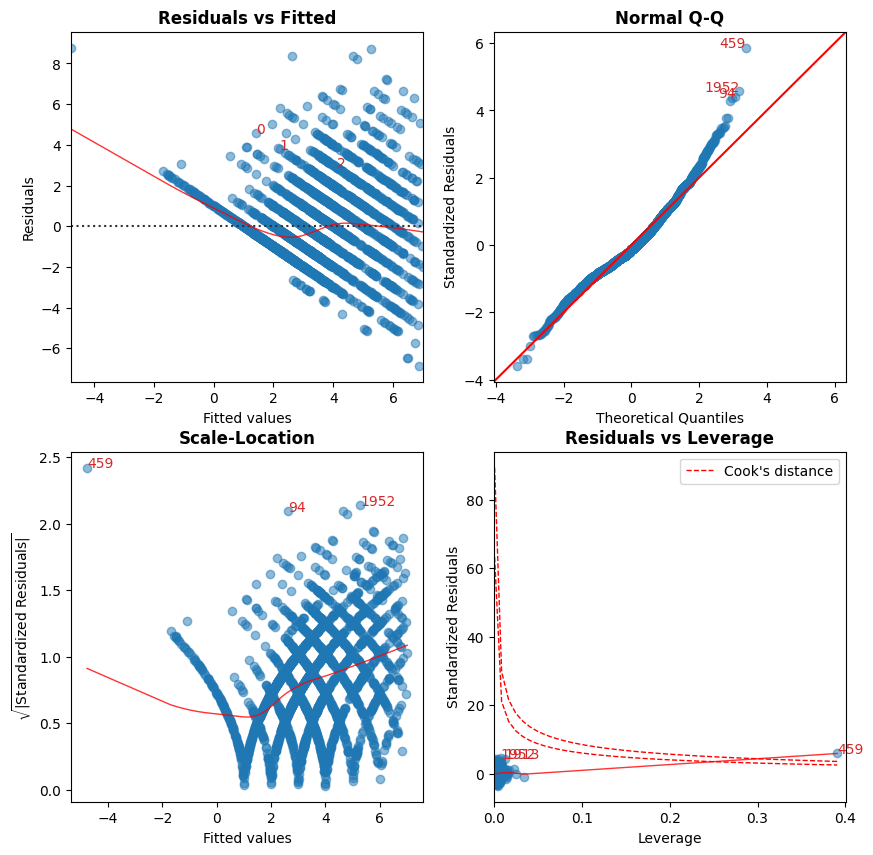

               Features  VIF Factor
2    actual_river_slope        1.12
4     prec_annual_catch        1.45
3  elevation_mean_catch        5.90
1              altitude        7.29
7             temp_july       14.15
6          temp_january       27.07
5           temp_annual       56.77
0             Intercept      449.68


In [12]:
cls = Linear_Reg_Diagnostic(model)
fig, ax = cls()